In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Load the dataset (replace 'your_dataset.csv' with your actual file)
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Coursera AI PM/CCPP_data.csv')
df.head()

# Data source:
# Pınar Tüfekci, Prediction of full load electrical power output of a base load operated combined cycle power plant using machine learning methods, International Journal of Electrical Power & Energy Systems, Volume 60, September 2014, Pages 126-140, ISSN 0142-0615.

# Information from the project and research:
# (1) Ambient Temperature (AT): This input variable is measured in whole degrees in Celsius as it varies between 1.81 C and 37.11 C.
# (2) Atmospheric Pressure (AP): This input variable is measured in units of minibars with the range of 992.89–1033.30 mbar.
# (3) Relative Humidity (RH): This variable is measured as a percentage from 25.56% to 100.16%.
# (4) Vacuum (Exhaust Steam Pressure, V): This variable is measured in cm Hg with the range of 25.36–81.56 cm Hg.
# (5) Full Load Electrical Power Output (PE): PE is used as a target variable in the dataset. It is measured in mega watt with the range of 420.26–495.76 MW.

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [22]:
print(df.corr())

          AT         V        AP        RH        PE
AT  1.000000  0.844107 -0.507549 -0.542535 -0.948128
V   0.844107  1.000000 -0.413502 -0.312187 -0.869780
AP -0.507549 -0.413502  1.000000  0.099574  0.518429
RH -0.542535 -0.312187  0.099574  1.000000  0.389794
PE -0.948128 -0.869780  0.518429  0.389794  1.000000


In [23]:
print(df.describe())

                AT            V           AP           RH           PE
count  9568.000000  9568.000000  9568.000000  9568.000000  9568.000000
mean     19.651231    54.305804  1013.259078    73.308978   454.365009
std       7.452473    12.707893     5.938784    14.600269    17.066995
min       1.810000    25.360000   992.890000    25.560000   420.260000
25%      13.510000    41.740000  1009.100000    63.327500   439.750000
50%      20.345000    52.080000  1012.940000    74.975000   451.550000
75%      25.720000    66.540000  1017.260000    84.830000   468.430000
max      37.110000    81.560000  1033.300000   100.160000   495.760000


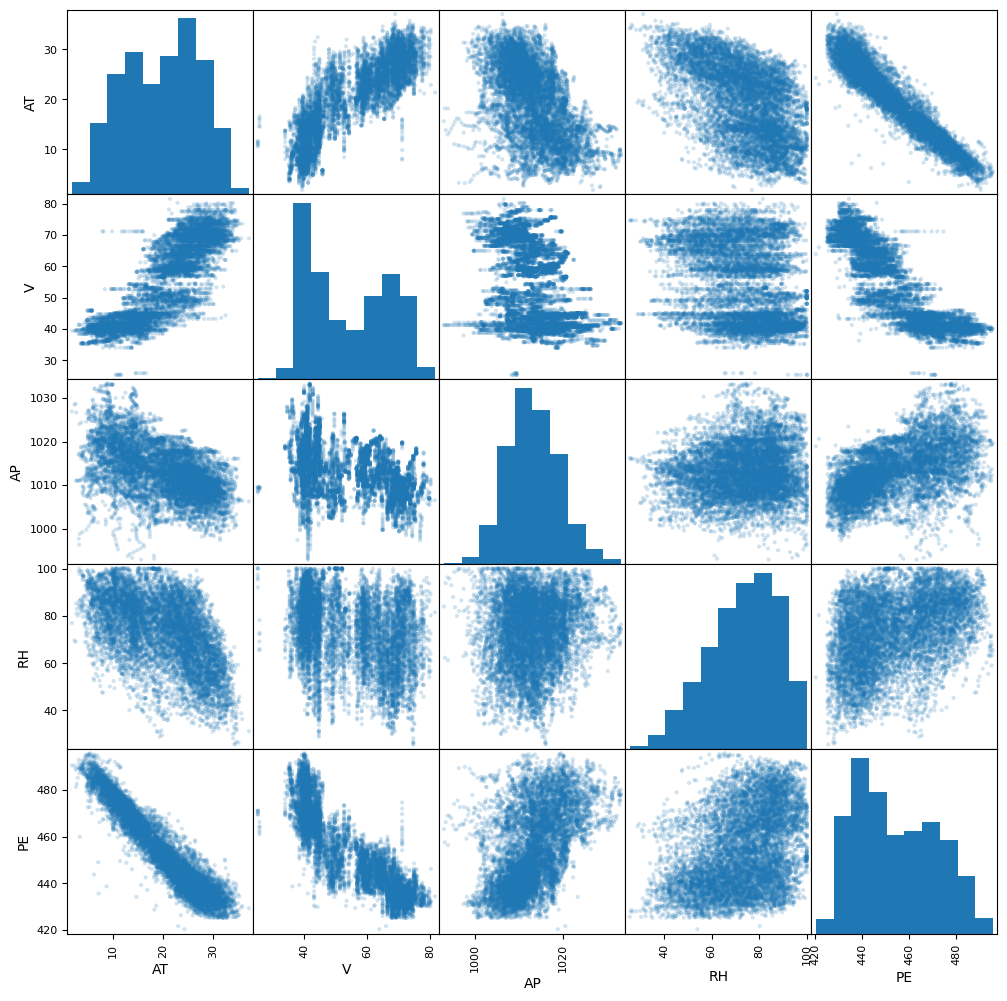

In [24]:
# Select the columns for the pairwise scatter plot
columns_to_plot = ['AT', 'V', 'AP', 'RH', 'PE']

# Create the pairwise scatter plot
pd.plotting.scatter_matrix(df[columns_to_plot], alpha=0.2, figsize=(12, 12), diagonal='hist')
plt.show()

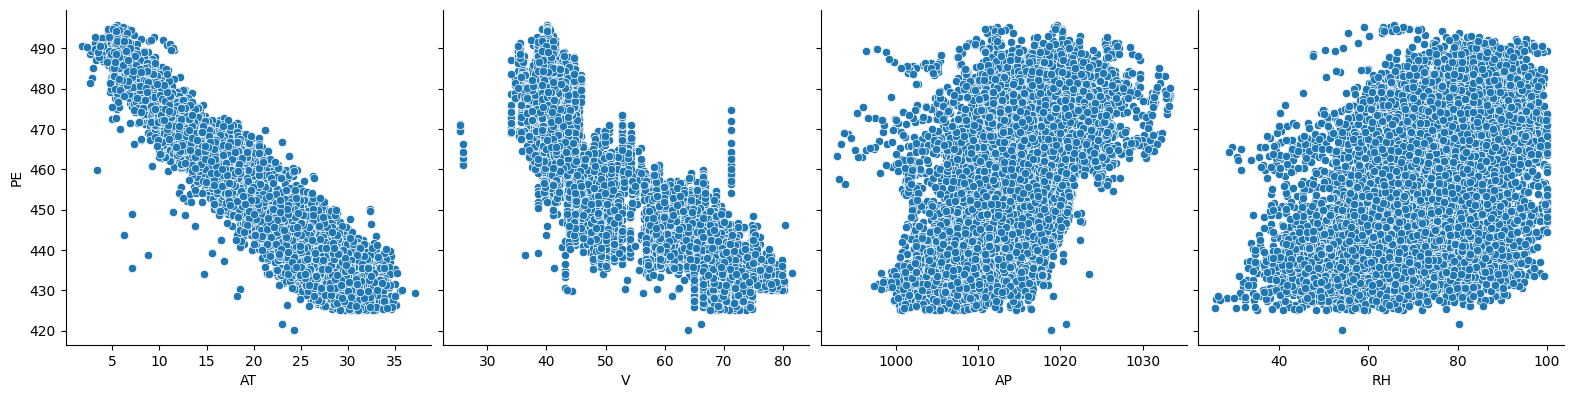

In [25]:
# Finding correlations between AT, V, AP, RH vs PE
sns.pairplot(df, x_vars=['AT', 'V', 'AP', 'RH'], y_vars='PE', height=4, aspect=1, kind='scatter')
plt.show()

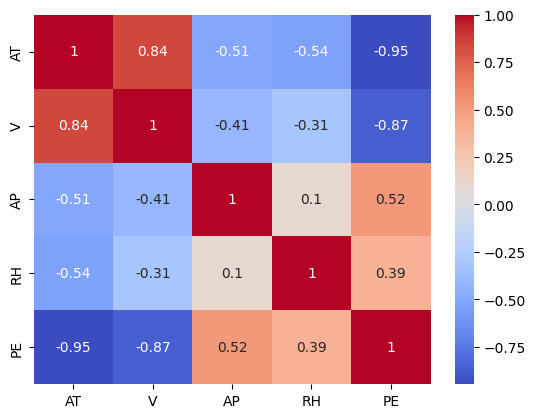

In [26]:
# Create the correlation matrix and represent it as a heatmap.
sns.heatmap(df.corr(), annot = True, cmap = 'coolwarm')
plt.show()

We focused on 4 key performance metrics for this project:

*   R2 indicates the general correlation between the actual values and the predicted values, and thus, it provides a
measure of the overall explanatory power of the model. To allow
graphical interpretation of R2, actual and predicted values were plotted
in a scatter plot. -- Score close to 1.0 indicate strong correlation between actual vs. predicted values

*   MAPE measures the difference between the actual and
the predicted value in relative terms and, therefore, provides an intuitive
percentage measure of the average error. -- Low values desired

*   RMSE first squares the errors to give more weight to larger errors (thus, being sensitive to outliers) but
then applies the square root to convert the metric back to the same unit
as the output label to facilitate interpretability. -- Low values desired

* Training Time measures the time required for the model training -- the more time required, the more computation load is needed

The combination of these 4 performance metrics shall allow detailed interpretation of the prediction results, indicating not only the overall correlation between actual and predicted values but also the impact of outliers and the generalization of our model to unseen data.

In [27]:
# Define features (X) and target (y) -- Model 1, only using AT (Ambient Temperature)
X = df[['AT']]
y = df['PE']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100) #30% test, 70% train

# Initialize and train the linear regression model
model1 = LinearRegression()

# Time the model training
start_time1 = time.time()
model1.fit(X_train, y_train)
end_time1 = time.time()
training_time1 = end_time1 - start_time1

# Make predictions on the test set
y_pred1 = model1.predict(X_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred1))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred1))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print('R Squared Error:', metrics.r2_score(y_test,y_pred1))
print(f"Training Time: {training_time1:.4f} seconds")

# Cross-validation
scores = cross_val_score(model1, X, y, cv=5) # cv is the number of folds, here defined as 5
print("Cross-validation scores:", scores)
print("Average cross-validation score:", scores.mean())

Mean Absolute Error: 4.342788035924462
Mean Squared Error: 30.69619911967673
Root Mean Squared Error: 5.540415067454489
R Squared Error: 0.8956516871035818
Training Time: 0.0026 seconds
Cross-validation scores: [0.8994794  0.89733768 0.90302574 0.89915667 0.89512129]
Average cross-validation score: 0.8988241562050259


In [28]:
#Actual value and the predicted value -- Model 1
reg_model_diff1 = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred1})
reg_model_diff1

,Actual value,Predicted value
2708,434.31,438.280083
6408,478.82,476.971471
435,473.57,476.602568
5777,481.49,483.394719
2863,453.22,452.146486
...,...,...
5713,482.15,478.316881
4675,464.22,465.123183
5837,432.64,437.477177
5153,449.13,454.425003


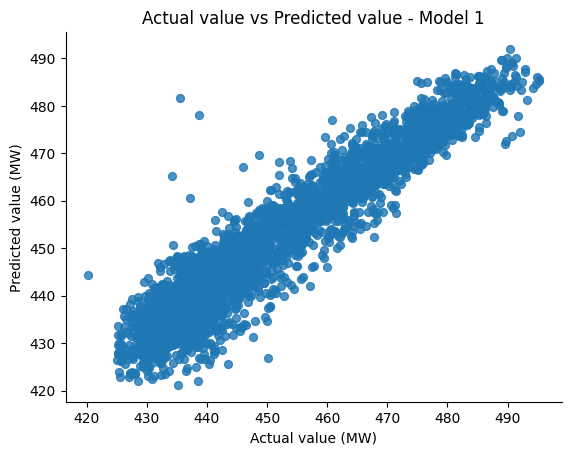

In [29]:
# Actual value vs Predicted value -- Model 1
from matplotlib import pyplot as plt
reg_model_diff1.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.xlabel('Actual value (MW)')
plt.ylabel('Predicted value (MW)')
plt.title('Actual value vs Predicted value - Model 1')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [30]:
# Define features (X) and target (y) -- Model 2, using all features
X2 = df[['AT', 'V', 'AP', 'RH']]
y2 = df['PE']

# Split data into training and testing sets
X2_train, X2_test, y2_train, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=100)

# Initialize and train the linear regression model
# Time the model training
model2 = LinearRegression()
start_time2 = time.time()
model2.fit(X2_train, y2_train)
end_time2 = time.time()
training_time2 = end_time2 - start_time2

# Make predictions on the test set
y_pred2 = model2.predict(X2_test)

# Evaluate the model
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred2))
print('Mean Squared Error:', metrics.mean_squared_error(y_test2, y_pred2))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test2, y_pred2)))
print('R Squared Error:', metrics.r2_score(y_test2,y_pred2))
print(f"Training Time: {training_time1:.4f} seconds")

# Cross-validation
scores2 = cross_val_score(model2, X2, y2, cv=5)
print("Cross-validation scores:", scores2)
print("Average cross-validation score:", scores2.mean())

Mean Absolute Error: 3.693924928673177
Mean Squared Error: 22.229981269439318
Root Mean Squared Error: 4.714868107321701
R Squared Error: 0.924431652526712
Training Time: 0.0026 seconds
Cross-validation scores: [0.93053597 0.92681472 0.93389127 0.92680208 0.92464499]
Average cross-validation score: 0.9285378066739307


In [31]:
# Actual value and the predicted value -- Model 2
reg_model_diff2 = pd.DataFrame({'Actual value': y_test2, 'Predicted value': y_pred2})
reg_model_diff2

,Actual value,Predicted value
2708,434.31,434.642229
6408,478.82,474.850405
435,473.57,478.370551
5777,481.49,482.603725
2863,453.22,452.419154
...,...,...
5713,482.15,480.294985
4675,464.22,464.768758
5837,432.64,435.870584
5153,449.13,452.178883


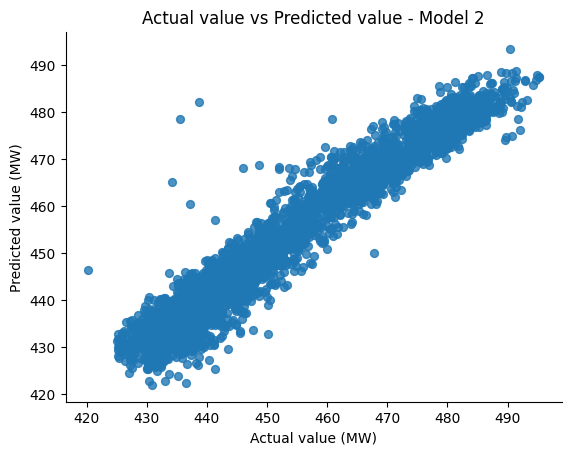

In [32]:
# Actual value vs Predicted value -- Model 2
reg_model_diff2.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.xlabel('Actual value (MW)')
plt.ylabel('Predicted value (MW)')
plt.title('Actual value vs Predicted value - Model 2')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [33]:
# Model 3: Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

X3 = df[['AT', 'V', 'AP', 'RH']]
y3 = df['PE']

X3_train, X3_test, y3_train, y_test3 = train_test_split(X3, y3, test_size=0.3, random_state=100)

model3 = DecisionTreeRegressor(random_state=100)

start_time3 = time.time()
model3.fit(X3_train, y3_train)
end_time3 = time.time()
training_time3 = end_time3 - start_time3

y_pred3 = model3.predict(X3_test)

print('Model 3 - Decision Tree Regressor')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred3))
print('Mean Squared Error:', metrics.mean_squared_error(y_test3, y_pred3))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test3, y_pred3)))
print('R Squared Error:', metrics.r2_score(y_test3, y_pred3))
print(f"Training Time: {training_time3:.4f} seconds")

#Cross-validation
from sklearn.model_selection import cross_val_score
scores3 = cross_val_score(model3, X3, y3, cv=5)
print("Cross-validation scores:", scores3)
print("Average cross-validation score:", scores3.mean())

Model 3 - Decision Tree Regressor
Mean Absolute Error: 3.17722744688262
Mean Squared Error: 22.220260397074195
Root Mean Squared Error: 4.713837120337761
R Squared Error: 0.9244646975505348
Training Time: 0.0480 seconds
Cross-validation scores: [0.91680355 0.92308746 0.93386384 0.9367682  0.92780578]
Average cross-validation score: 0.9276657636832144


In [34]:
reg_model_diff3 = pd.DataFrame({'Actual value': y_test3, 'Predicted value': y_pred3})
reg_model_diff3

,Actual value,Predicted value
2708,434.31,432.26
6408,478.82,471.79
435,473.57,475.48
5777,481.49,481.02
2863,453.22,455.16
...,...,...
5713,482.15,480.38
4675,464.22,459.31
5837,432.64,431.27
5153,449.13,453.58


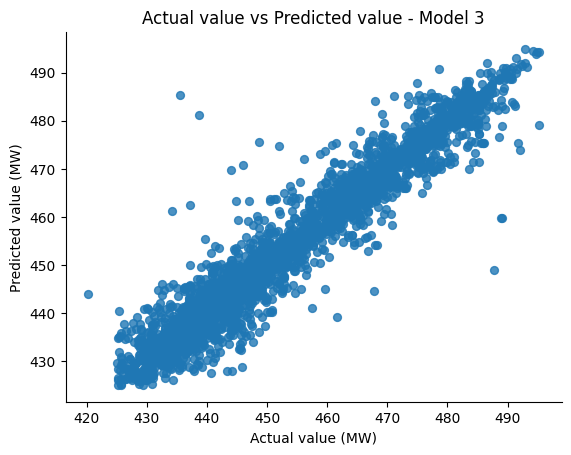

In [35]:
reg_model_diff3.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.xlabel('Actual value (MW)')
plt.ylabel('Predicted value (MW)')
plt.title('Actual value vs Predicted value - Model 3')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

In [36]:
# Model 4: Random Forest Regressor

from sklearn.ensemble import RandomForestRegressor

X4 = df[['AT', 'V', 'AP', 'RH']]
y4 = df['PE']

X4_train, X4_test, y4_train, y_test4 = train_test_split(X4, y4, test_size=0.3, random_state=100)

model4 = RandomForestRegressor(random_state=100)

start_time4 = time.time()
model4.fit(X4_train, y4_train)
end_time4 = time.time()
training_time4 = end_time4 - start_time4

y_pred4 = model4.predict(X4_test)

print('Model 4 - Random Forest Regressor')
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred4))
print('Mean Squared Error:', metrics.mean_squared_error(y_test4, y_pred4))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test4, y_pred4)))
print('R Squared Error:', metrics.r2_score(y_test4, y_pred4))
print(f"Training Time: {training_time4:.4f} seconds")

# Cross-validation
scores4 = cross_val_score(model4, X4, y4, cv=5)
print("Cross-validation scores:", scores4)
print("Average cross-validation score:", scores4.mean())

Model 4 - Random Forest Regressor
Mean Absolute Error: 2.5134073841866944
Mean Squared Error: 13.235483157826561
Root Mean Squared Error: 3.6380603565398086
R Squared Error: 0.9550074479089871
Training Time: 4.3353 seconds
Cross-validation scores: [0.96044357 0.95965754 0.96668458 0.96357414 0.96033915]
Average cross-validation score: 0.9621397974835217


In [37]:
reg_model_diff4 = pd.DataFrame({'Actual value': y_test4, 'Predicted value': y_pred4})
reg_model_diff4

,Actual value,Predicted value
2708,434.31,433.5185
6408,478.82,476.7485
435,473.57,476.5717
5777,481.49,482.5453
2863,453.22,452.3505
...,...,...
5713,482.15,481.1120
4675,464.22,466.5329
5837,432.64,432.0736
5153,449.13,452.5430


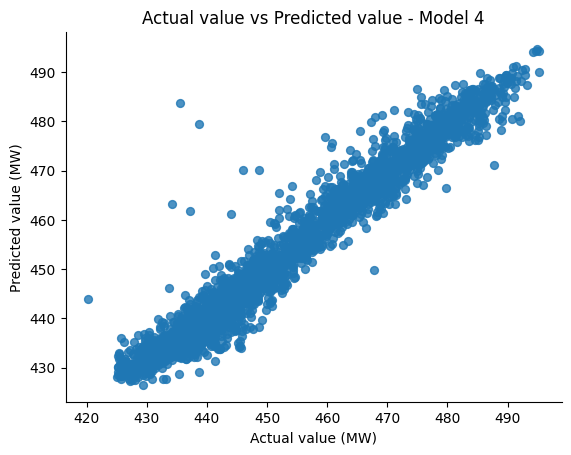

In [38]:
reg_model_diff4.plot(kind='scatter', x='Actual value', y='Predicted value', s=32, alpha=.8)
plt.xlabel('Actual value (MW)')
plt.ylabel('Predicted value (MW)')
plt.title('Actual value vs Predicted value - Model 4')
plt.gca().spines[['top', 'right',]].set_visible(False)
plt.show()

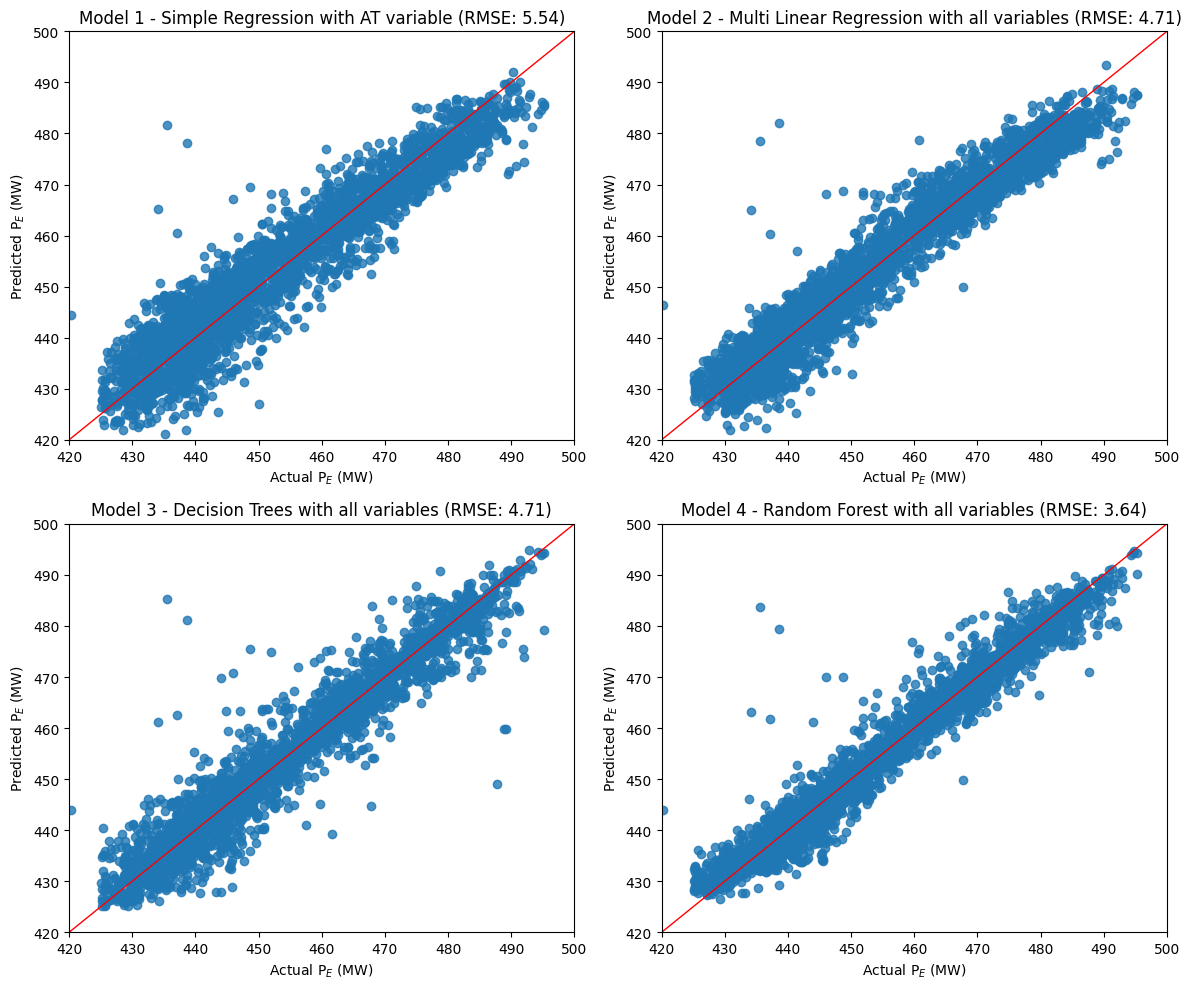

In [39]:
rmse1 = np.sqrt(metrics.mean_squared_error(y_test, y_pred1))
rmse2 = np.sqrt(metrics.mean_squared_error(y_test2, y_pred2))
rmse3 = np.sqrt(metrics.mean_squared_error(y_test3, y_pred3))
rmse4 = np.sqrt(metrics.mean_squared_error(y_test4, y_pred4))

plt.figure(figsize=(12, 10))

# Define the x and y limits for all plots
x_min, x_max = 420, 500
y_min, y_max = 420, 500

plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred1, alpha=0.8)
plt.xlabel('Actual P$_{E}$ (MW)')
plt.ylabel('Predicted P$_{E}$ (MW)')
plt.title(f'Model 1 - Simple Regression with AT variable (RMSE: {rmse1:.2f})')
plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='-', linewidth=1)


plt.subplot(2, 2, 2)
plt.scatter(y_test2, y_pred2, alpha=0.8)
plt.xlabel('Actual P$_{E}$ (MW)')
plt.ylabel('Predicted P$_{E}$ (MW)')
plt.title(f'Model 2 - Multi Linear Regression with all variables (RMSE: {rmse2:.2f})')
plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='-', linewidth=1)


plt.subplot(2, 2, 3)
plt.scatter(y_test3, y_pred3, alpha=0.8)
plt.xlabel('Actual P$_{E}$ (MW)')
plt.ylabel('Predicted P$_{E}$ (MW)')
plt.title(f'Model 3 - Decision Trees with all variables (RMSE: {rmse3:.2f})')
plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='-', linewidth=1)


plt.subplot(2, 2, 4)
plt.scatter(y_test4, y_pred4, alpha=0.8)
plt.xlabel('Actual P$_{E}$ (MW)')
plt.ylabel('Predicted P$_{E}$ (MW)')
plt.title(f'Model 4 - Random Forest with all variables (RMSE: {rmse4:.2f})')
plt.xlim(x_min, x_max)  # Set x-axis limits
plt.ylim(y_min, y_max)  # Set y-axis limits
plt.plot([x_min, x_max], [y_min, y_max], color='red', linestyle='-', linewidth=1)


plt.tight_layout()
plt.show()

In [56]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Calculate MAPE for each model
mape1 = mean_absolute_percentage_error(y_test, y_pred1)
mape2 = mean_absolute_percentage_error(y_test2, y_pred2)
mape3 = mean_absolute_percentage_error(y_test3, y_pred3)
mape4 = mean_absolute_percentage_error(y_test4, y_pred4)

# Create a dictionary to store the performance metrics
model_metrics = {
    'Model': ['Model 1 - Simple LR', 'Model 2 - Multi LR', 'Model 3 - Decision Trees', 'Model 4 - Random Forest'],
    'MAE': [metrics.mean_absolute_error(y_test, y_pred1),
            metrics.mean_absolute_error(y_test2, y_pred2),
            metrics.mean_absolute_error(y_test3, y_pred3),
            metrics.mean_absolute_error(y_test4, y_pred4)],
    'MAPE': [mape1, mape2, mape3, mape4],
    'RMSE': [rmse1, rmse2, rmse3, rmse4],
    'R^2': [metrics.r2_score(y_test, y_pred1),
           metrics.r2_score(y_test2, y_pred2),
           metrics.r2_score(y_test3, y_pred3),
           metrics.r2_score(y_test4, y_pred4)],
    'Training Time (s)': [training_time1, training_time2, training_time3, training_time4],
    'Avg Cross-Validation Score': [scores.mean(), scores2.mean(), scores3.mean(), scores4.mean()]
}

# Create a Pandas DataFrame from the dictionary
metrics_df = pd.DataFrame(model_metrics)
pd.set_option("display.precision", 4)


# Export the DataFrame to an Excel file
metrics_df.to_excel('/content/drive/MyDrive/Colab Notebooks/Coursera AI PM/model-metrics.xlsx', index=False)

# Display the DataFrame as a table
metrics_df

,Model,MAE,MAPE,RMSE,R^2,Training Time (s),Avg Cross-Validation Score
0,Model 1 - Simple LR,4.3428,0.9606,5.5404,0.8957,0.0026,0.8988
1,Model 2 - Multi LR,3.6939,0.8145,4.7149,0.9244,0.0034,0.9285
2,Model 3 - Decision Trees,3.1772,0.7011,4.7138,0.9245,0.0480,0.9277
3,Model 4 - Random Forest,2.5134,0.5540,3.6381,0.9550,4.3353,0.9621
